In [1]:
import pandas as pd 
import numpy as np
import sqlite3
import matplotlib.pyplot as plt

In [2]:
path = "/Users/phoebeclark/Desktop/viirs-snpp_2021_United_States.csv"
dfSat = pd.read_csv(path)

In [3]:
dfSat.head(25)

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight,type
0,43.476295,-71.587440,297.23,0.48,0.40,2021-01-01,624,N,VIIRS,n,1,269.23,0.68,N,0
1,43.246197,-72.420631,298.24,0.52,0.42,2021-01-01,624,N,VIIRS,n,1,267.55,1.06,N,0
2,40.890423,-77.711998,318.41,0.59,0.53,2021-01-01,624,N,VIIRS,n,1,269.67,3.09,N,2
3,39.589787,-75.633263,295.77,0.44,0.46,2021-01-01,624,N,VIIRS,n,1,276.95,1.78,N,2
4,27.574802,-81.772072,298.91,0.37,0.58,2021-01-01,624,N,VIIRS,n,1,284.31,0.51,N,0
5,40.893353,-77.710152,312.61,0.59,0.53,2021-01-01,624,N,VIIRS,n,1,268.35,2.59,N,2
6,27.572512,-81.771141,304.87,0.37,0.58,2021-01-01,624,N,VIIRS,n,1,284.69,0.51,N,0
7,40.637196,-74.224022,296.47,0.39,0.44,2021-01-01,624,N,VIIRS,n,1,276.83,2.13,N,2
8,40.153122,-74.767990,306.28,0.41,0.45,2021-01-01,624,N,VIIRS,n,1,270.51,1.65,N,3
9,39.937912,-76.817383,307.60,0.52,0.50,2021-01-01,624,N,VIIRS,n,1,270.05,1.54,N,2


In [4]:
#BEN
#round the lat and long to align with project
dfSat['latitude_rounded'] = round(dfSat['latitude'], 2)
dfSat['longitude_rounded'] = round(dfSat['longitude'], 2)

In [5]:
#BEN
#split up the aqc date into year, month, day
dfSat['acq_date'] = dfSat['acq_date'].astype('str').str.split(pat = '-')

In [6]:
#BEN
##seperating out year month day into seperate columns 
dfSat['year'] = pd.DataFrame(dfSat.acq_date.tolist())[0]
dfSat['month'] = pd.DataFrame(dfSat.acq_date.tolist())[1]
dfSat['day'] = pd.DataFrame(dfSat.acq_date.tolist())[2]

In [7]:
#BEN
#now ge the weather data based on coordinates and date  
#start by creating the columns i want filled out related to the meteostat output
import numpy as np
dfSat['tavg'] = np.nan
dfSat['tmin'] = np.nan
dfSat['tmax'] = np.nan
dfSat['prcp'] = np.nan
dfSat['snow'] = np.nan
dfSat['wdir'] = np.nan
dfSat['wspd'] = np.nan
dfSat['wpgt'] = np.nan
dfSat['pres'] = np.nan
dfSat['tsun'] = np.nan

In [8]:
#BEN
#create a function to get the weather 
#again, documemntation from this library: https://dev.meteostat.net/python/
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily

In [9]:
#BEN
#the function below gets the weather data for a specific coordinate and date
#it returns a list of [0]tavg, [1]tmin, [2]tmax, [3]prcp, [4]snow, [5]wdir, [6]wspd, [7]wpgt, [8]pres, [9]tsun
def GetWeather(lat, lon, year, month, day):
    start = datetime(year, month, day)
    end = datetime(year, month, day)
    coord = Point(lat, lon)
    data = Daily(coord, start, end)
    data = data.fetch()
    #print(data)
    #print(data.iloc[0, 0])
    #get a list of results
    counter = list(range(0,10)) #list 0-9
    WeatherData = [] #this list serves as a list for data values [0]tavg, [1]tmin, [2]tmax, [3]prcp, [4]snow, [5]wdir, [6]wspd, [7]wpgt, [8]pres, [9]tsun
    try:
        for i in counter:
            WeatherData.append(data.iloc[0, i])
    except:
        WeatherData = [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]    
    print(data)
    return(WeatherData)


In [10]:
#BEN
#now populate the weather data for each FIRMS observation 
rowcount = 0 #this will serve as a counter for us to see the progress, if we want 
dfSatTest = dfSat.iloc[:100] #created a small test df if you want to use it
#WARNING: if you just want to test this out I recommend replacing "dfSat" with "dfSatTest" in the 'for' loop below to only run the script on the first 100 rows of the export
for index, row in dfSat.iterrows():
    print("Currently on index " + str(rowcount) + ". Weather result is:") #this tracks progress as the script runs, comment it out if you want
    latx = row['latitude_rounded']
    longx = row['longitude_rounded']
    yrx = int(row['year'])
    monthx = int(row['month'])
    dayx = int(row['day'])
    WeatherList = GetWeather(latx, longx, yrx, monthx, dayx)
    #list contents: [0]tavg, [1]tmin, [2]tmax, [3]prcp, [4]snow, [5]wdir, [6]wspd, [7]wpgt, [8]pres, [9]tsun
    dfSat.at[index, 'tavg'] = WeatherList[0]
    dfSat.at[index, 'tmin'] = WeatherList[1]
    dfSat.at[index, 'tmax'] = WeatherList[2]
    dfSat.at[index, 'prcp'] = WeatherList[3]
    dfSat.at[index, 'snow'] = WeatherList[4]
    dfSat.at[index, 'wdir'] = WeatherList[5]
    dfSat.at[index, 'wspd'] = WeatherList[6]
    dfSat.at[index, 'wpgt'] = WeatherList[7]
    dfSat.at[index, 'pres'] = WeatherList[8]
    dfSat.at[index, 'tsun'] = WeatherList[9]
    rowcount = rowcount + 1 

Currently on index 0. Weather result is:
            tavg  tmin  tmax  prcp  snow   wdir  wspd  wpgt    pres  tsun
time                                                                     
2021-01-01  -1.6  -3.9   1.1   1.0  50.0  350.0   4.9   NaN  1029.6   NaN
Currently on index 1. Weather result is:
            tavg  tmin  tmax  prcp  snow  wdir  wspd  wpgt    pres  tsun
time                                                                    
2021-01-01  -2.9  -6.7   0.0   0.9   NaN   6.0   0.8   NaN  1030.3   NaN
Currently on index 2. Weather result is:
            tavg  tmin  tmax  prcp  snow  wdir  wspd  wpgt    pres  tsun
time                                                                    
2021-01-01  -2.1  -6.0   0.5   2.4   NaN   8.0   2.8   NaN  1024.8   NaN
Currently on index 3. Weather result is:
            tavg  tmin  tmax  prcp  snow  wdir  wspd  wpgt  pres  tsun
time                                                                  
2021-01-01   1.1  -3.8   4.4  21.8

UnpicklingError: pickle data was truncated

In [11]:
dfSat.head(20)

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,...,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,43.476295,-71.587440,297.23,0.48,0.40,"[2021, 01, 01]",624,N,VIIRS,n,...,-1.6,-3.9,1.1,1.0,50.0,350.0,4.9,NaN,1029.6,NaN
1,43.246197,-72.420631,298.24,0.52,0.42,"[2021, 01, 01]",624,N,VIIRS,n,...,-2.9,-6.7,0.0,0.9,NaN,6.0,0.8,NaN,1030.3,NaN
2,40.890423,-77.711998,318.41,0.59,0.53,"[2021, 01, 01]",624,N,VIIRS,n,...,-2.1,-6.0,0.5,2.4,NaN,8.0,2.8,NaN,1024.8,NaN
3,39.589787,-75.633263,295.77,0.44,0.46,"[2021, 01, 01]",624,N,VIIRS,n,...,1.1,-3.8,4.4,21.8,0.0,NaN,12.2,NaN,NaN,NaN
4,27.574802,-81.772072,298.91,0.37,0.58,"[2021, 01, 01]",624,N,VIIRS,n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,40.893353,-77.710152,312.61,0.59,0.53,"[2021, 01, 01]",624,N,VIIRS,n,...,-2.1,-6.0,0.5,2.4,NaN,8.0,2.8,NaN,1024.8,NaN
6,27.572512,-81.771141,304.87,0.37,0.58,"[2021, 01, 01]",624,N,VIIRS,n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,40.637196,-74.224022,296.47,0.39,0.44,"[2021, 01, 01]",624,N,VIIRS,n,...,1.8,-1.2,4.2,17.3,0.0,28.0,9.7,NaN,1029.1,NaN
8,40.153122,-74.767990,306.28,0.41,0.45,"[2021, 01, 01]",624,N,VIIRS,n,...,0.4,-3.9,3.9,21.1,NaN,19.0,9.5,NaN,1028.0,NaN
9,39.937912,-76.817383,307.60,0.52,0.50,"[2021, 01, 01]",624,N,VIIRS,n,...,-0.7,-4.9,1.1,17.5,0.0,26.0,5.0,NaN,1028.4,NaN


In [12]:
#TI_4: VIIRS I-4 channel brightness temperature of the fire pixel measured in Kelvin
#Summary statistics for TI_4 measure
dfSat['bright_ti4'].describe()

count    661058.000000
mean        327.676032
std          21.424163
min         208.000000
25%         307.280000
50%         330.100000
75%         343.300000
max         367.000000
Name: bright_ti4, dtype: float64

<AxesSubplot:>

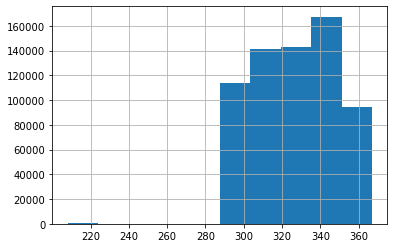

In [13]:
#Histogram of TI4 brightness distribution 
dfSat['bright_ti4'].hist()

<AxesSubplot:>

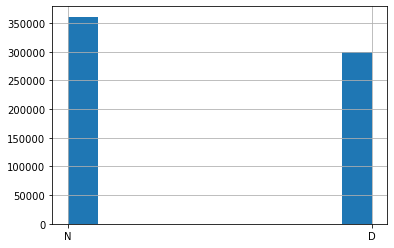

In [14]:
#Fires occuring during the day vs. t henight 
dfSat['daynight'].hist()

In [15]:
#Specific instances of fire occuring during the day vs. the night
#Two columns ~equal, not revelant 
dfSat['daynight'].value_counts()

N    360993
D    300065
Name: daynight, dtype: int64

In [16]:
#% of night fires is roughly 55%
360993/661058

0.5460837021864949

<AxesSubplot:>

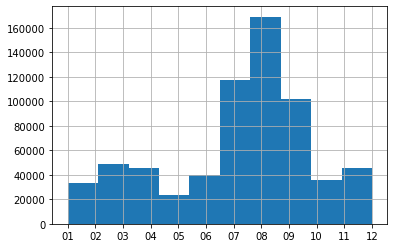

In [17]:
#Distribution of months of fire indices
#Fires most common during months ~[6.5, 9.75]
dfSat['month'].hist()

In [18]:
#Summary statistics for Fire Radiative Power
dfSat['frp'].describe()

count    661058.000000
mean         15.237824
std          50.480502
min           0.000000
25%           1.750000
50%           3.980000
75%          10.120000
max        2402.740000
Name: frp, dtype: float64

<AxesSubplot:>

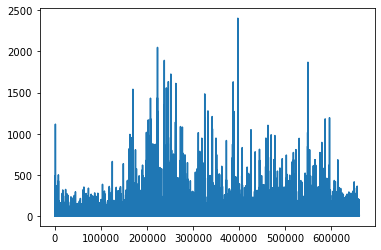

In [19]:
dfSat['frp'].plot()

In [20]:
#Do we have causes of fires?

#Can we seperate long/lats into states?
# import module
from geopy.geocoders import Nominatim

In [21]:
# initialize Nominatim API 
geolocator = Nominatim(user_agent="geoapiExercises")

In [22]:
# Latitude & Longitude input
#Using row 0 as an example
Latitude = "43.476295"
Longitude = "-71.587440"
  
location = geolocator.reverse(Latitude+","+Longitude)
  

print(location)

Styles Bridges Highway, Tilton, Belknap County, New Hampshire, 03276, United States


In [23]:
#Again, using row 0 as an example
address = location.raw['address']
print(address)

{'road': 'Styles Bridges Highway', 'village': 'Tilton', 'county': 'Belknap County', 'state': 'New Hampshire', 'postcode': '03276', 'country': 'United States', 'country_code': 'us'}


In [24]:
city = address.get('city', '')
state = address.get('state', '')
country = address.get('country', '')
code = address.get('country_code')
zipcode = address.get('postcode')
print('City : ',city)
print('State : ',state)
print('Country : ',country)
print('Zip Code : ', zipcode)

City :  
State :  New Hampshire
Country :  United States
Zip Code :  03276


In [25]:
#Imports
import reverse_geocoder as rg 
import pprint 

In [26]:
#Identifying city, state, and county info for each long/lat pair
def reverseGeocode(coordinates): 
    result = rg.search(coordinates)
    # result is a list containing ordered dictionary. 
    pprint.pprint(result)  

# Driver function 
if __name__=="__main__": 

    for i in range(2):
        #For first 2 lines only
        coordinates =(dfSat['latitude'][i],dfSat['longitude'][i])
        reverseGeocode(coordinates)

Loading formatted geocoded file...
[{'admin1': 'New Hampshire',
  'admin2': 'Belknap County',
  'cc': 'US',
  'lat': '43.48924',
  'lon': '-71.5823',
  'name': 'Sanbornton'}]
[{'admin1': 'New Hampshire',
  'admin2': 'Sullivan County',
  'cc': 'US',
  'lat': '43.23869',
  'lon': '-72.42453',
  'name': 'Charlestown'}]


In [27]:
dfSat.describe()

,latitude,longitude,bright_ti4,scan,track,acq_time,version,bright_ti5,frp,type,...,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
count,661058.000000,661058.000000,661058.000000,661058.000000,661058.000000,661058.000000,661058.0,661058.000000,661058.000000,661058.000000,...,544.000000,544.000000,544.000000,467.000000,119.000000,516.000000,526.000000,0.0,463.000000,0.0
mean,39.253841,-108.865817,327.676032,0.463411,0.484963,1393.538180,1.0,292.888336,15.237824,0.297122,...,6.946691,1.408456,13.333640,0.424839,11.386555,229.114341,9.821673,NaN,1019.828510,NaN
std,6.337687,16.206571,21.424163,0.090335,0.118688,542.419425,0.0,12.719078,50.480502,0.782485,...,4.716581,4.741848,5.482276,2.739824,40.347665,103.798556,4.860024,NaN,3.858931,NaN
min,19.385105,-176.154297,208.000000,0.320000,0.360000,0.000000,1.0,225.840000,0.000000,0.000000,...,-7.600000,-16.600000,-2.800000,0.000000,0.000000,0.000000,0.400000,NaN,1003.500000,NaN
25%,34.847001,-121.068600,307.280000,0.390000,0.380000,924.000000,1.0,285.720000,1.750000,0.000000,...,5.075000,-1.000000,10.600000,0.000000,0.000000,184.000000,6.100000,NaN,1017.700000,NaN
50%,40.107962,-115.402519,330.100000,0.440000,0.450000,1048.000000,1.0,291.200000,3.980000,0.000000,...,7.350000,2.000000,14.000000,0.000000,0.000000,261.000000,9.100000,NaN,1021.100000,NaN
75%,42.747587,-94.335836,343.300000,0.520000,0.570000,1942.000000,1.0,298.340000,10.120000,0.000000,...,9.700000,4.600000,16.200000,0.000000,0.000000,314.000000,12.550000,NaN,1022.200000,NaN
max,70.462181,179.585876,367.000000,0.800000,0.780000,2354.000000,1.0,380.000000,2402.740000,3.000000,...,19.500000,14.000000,27.200000,35.600000,230.000000,357.000000,27.700000,NaN,1030.300000,NaN


In [28]:
print(len(dfSat.index))

661058


In [ ]:
#Finding City, State, County data for all data
def reverseGeocode(coordinates): 
    result = rg.search(coordinates)
    pprint.pprint(result)  

if __name__=="__main__": 
#For all data in dataframe
    for i in range(661058):
        coordinates =(dfSat['latitude'][i],dfSat['longitude'][i])
        reverseGeocode(coordinates)

[{'admin1': 'New Hampshire',
  'admin2': 'Belknap County',
  'cc': 'US',
  'lat': '43.48924',
  'lon': '-71.5823',
  'name': 'Sanbornton'}]
[{'admin1': 'New Hampshire',
  'admin2': 'Sullivan County',
  'cc': 'US',
  'lat': '43.23869',
  'lon': '-72.42453',
  'name': 'Charlestown'}]
[{'admin1': 'Pennsylvania',
  'admin2': 'Centre County',
  'cc': 'US',
  'lat': '40.91423',
  'lon': '-77.68472',
  'name': 'Zion'}]
[{'admin1': 'Delaware',
  'admin2': 'New Castle County',
  'cc': 'US',
  'lat': '39.57789',
  'lon': '-75.58881',
  'name': 'Delaware City'}]
[{'admin1': 'Florida',
  'admin2': 'Hardee County',
  'cc': 'US',
  'lat': '27.54726',
  'lon': '-81.81147',
  'name': 'Wauchula'}]
[{'admin1': 'Pennsylvania',
  'admin2': 'Centre County',
  'cc': 'US',
  'lat': '40.91423',
  'lon': '-77.68472',
  'name': 'Zion'}]
[{'admin1': 'Florida',
  'admin2': 'Hardee County',
  'cc': 'US',
  'lat': '27.54726',
  'lon': '-81.81147',
  'name': 'Wauchula'}]
[{'admin1': 'New Jersey',
  'admin2': 'Union 

In [29]:
dfSat.head()

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,...,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,43.476295,-71.587440,297.23,0.48,0.40,"[2021, 01, 01]",624,N,VIIRS,n,...,-1.6,-3.9,1.1,1.0,50.0,350.0,4.9,NaN,1029.6,NaN
1,43.246197,-72.420631,298.24,0.52,0.42,"[2021, 01, 01]",624,N,VIIRS,n,...,-2.9,-6.7,0.0,0.9,NaN,6.0,0.8,NaN,1030.3,NaN
2,40.890423,-77.711998,318.41,0.59,0.53,"[2021, 01, 01]",624,N,VIIRS,n,...,-2.1,-6.0,0.5,2.4,NaN,8.0,2.8,NaN,1024.8,NaN
3,39.589787,-75.633263,295.77,0.44,0.46,"[2021, 01, 01]",624,N,VIIRS,n,...,1.1,-3.8,4.4,21.8,0.0,NaN,12.2,NaN,NaN,NaN
4,27.574802,-81.772072,298.91,0.37,0.58,"[2021, 01, 01]",624,N,VIIRS,n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
#Creating columns for location data
dfSat['name'] = np.nan
dfSat['admin1'] = np.nan
dfSat['admin2'] = np.nan

In [33]:
dfSat.head()

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,...,prcp,snow,wdir,wspd,wpgt,pres,tsun,admin1,admin2,name
0,43.476295,-71.587440,297.23,0.48,0.40,"[2021, 01, 01]",624,N,VIIRS,n,...,1.0,50.0,350.0,4.9,NaN,1029.6,NaN,NaN,NaN,NaN
1,43.246197,-72.420631,298.24,0.52,0.42,"[2021, 01, 01]",624,N,VIIRS,n,...,0.9,NaN,6.0,0.8,NaN,1030.3,NaN,NaN,NaN,NaN
2,40.890423,-77.711998,318.41,0.59,0.53,"[2021, 01, 01]",624,N,VIIRS,n,...,2.4,NaN,8.0,2.8,NaN,1024.8,NaN,NaN,NaN,NaN
3,39.589787,-75.633263,295.77,0.44,0.46,"[2021, 01, 01]",624,N,VIIRS,n,...,21.8,0.0,NaN,12.2,NaN,NaN,NaN,NaN,NaN,NaN
4,27.574802,-81.772072,298.91,0.37,0.58,"[2021, 01, 01]",624,N,VIIRS,n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
dfSat = dSat.copy().rename(columns={ 'admin1': 'State'})
dfSat = dfSat.copy().rename(columns={ 'admin2': 'County'})
dfSat = dfSat.copy().rename(columns={ 'name': 'City'})

NameError: name 'dSat' is not defined

SyntaxError: unexpected EOF while parsing (800714856.py, line 8)